## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0713 13:50:11.268176 139668713273152 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 13:50:11.277840 139668713273152 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 13:50:11.280241 139668713273152 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 13:51:42.532711 139668713273152 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 13:51:42.540808 139668713273152 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 13:52:03.789886 139668713273152 deprecation.py:323] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 13:52:03.833957 139668713273152 deprecation_wrapper.py:119] From /home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.8858 - acc: 0.3266 - val_loss: 1.7295 - val_acc: 0.3865
Epoch 2/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.6631 - acc: 0.4102 - val_loss: 1.6178 - val_acc: 0.4321
Epoch 3/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.5688 - acc: 0.4438 - val_loss: 1.7054 - val_acc: 0.3975
Epoch 4/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.5025 - acc: 0.4668 - val_loss: 1.5131 - val_acc: 0.4570
Epoch 5/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.4498 - acc: 0.4854 - val_loss: 1.6189 - val_acc: 0.4139
Epoch 6/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4072 - acc: 0.5001 - val_loss: 1.5236 - val_acc: 0.4624
Epoch 7/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.3743 - acc: 0.5121 - val_loss: 1.4467

50000/50000 [==============================] - 7s 132us/step - loss: 0.3114 - acc: 0.8914 - val_loss: 2.3479 - val_acc: 0.5093
Epoch 60/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.3021 - acc: 0.8956 - val_loss: 2.4556 - val_acc: 0.5038
Epoch 61/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.2865 - acc: 0.8996 - val_loss: 2.3909 - val_acc: 0.5117
Epoch 62/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.2840 - acc: 0.9007 - val_loss: 2.4059 - val_acc: 0.5183
Epoch 63/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2674 - acc: 0.9064 - val_loss: 2.4436 - val_acc: 0.5147
Epoch 64/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.2653 - acc: 0.9072 - val_loss: 2.5286 - val_acc: 0.5132
Epoch 65/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.2549 - acc: 0.9093 - val_loss: 2.4376 - val_acc: 0.5130
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 8s 162us/step - loss: 0.0920 - acc: 0.9671 - val_loss: 3.6713 - val_acc: 0.5187
Epoch 118/500
50000/50000 [==============================] - 7s 150us/step - loss: 0.1093 - acc: 0.9624 - val_loss: 3.5970 - val_acc: 0.5204
Epoch 119/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.1292 - acc: 0.9545 - val_loss: 3.5302 - val_acc: 0.5207
Epoch 120/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0859 - acc: 0.9696 - val_loss: 3.6011 - val_acc: 0.5289
Epoch 121/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.0781 - acc: 0.9730 - val_loss: 3.6223 - val_acc: 0.5232
Epoch 122/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0955 - acc: 0.9669 - val_loss: 3.7444 - val_acc: 0.5274
Epoch 123/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.1207 - acc: 0.9568 - val_loss: 3.6326 - val_acc: 0.5221
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 135us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 4.0259 - val_acc: 0.5485
Epoch 176/500
50000/50000 [==============================] - 7s 139us/step - loss: 8.0010e-04 - acc: 0.9999 - val_loss: 4.0481 - val_acc: 0.5464
Epoch 177/500
50000/50000 [==============================] - 6s 128us/step - loss: 5.7011e-04 - acc: 1.0000 - val_loss: 4.0491 - val_acc: 0.5473
Epoch 178/500
50000/50000 [==============================] - 7s 133us/step - loss: 5.4320e-04 - acc: 1.0000 - val_loss: 4.0568 - val_acc: 0.5481
Epoch 179/500
50000/50000 [==============================] - 7s 144us/step - loss: 4.4743e-04 - acc: 1.0000 - val_loss: 4.0649 - val_acc: 0.5485
Epoch 180/500
50000/50000 [==============================] - 7s 145us/step - loss: 4.2698e-04 - acc: 1.0000 - val_loss: 4.0754 - val_acc: 0.5477
Epoch 181/500
50000/50000 [==============================] - 8s 158us/step - loss: 4.5225e-04 - acc: 1.0000 - val_loss: 4.0759 - val_acc: 0.5485
Epo

50000/50000 [==============================] - 6s 130us/step - loss: 1.6453e-04 - acc: 1.0000 - val_loss: 4.1938 - val_acc: 0.5508
Epoch 232/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.6329e-04 - acc: 1.0000 - val_loss: 4.1952 - val_acc: 0.5504
Epoch 233/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.6159e-04 - acc: 1.0000 - val_loss: 4.1950 - val_acc: 0.5508
Epoch 234/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.5978e-04 - acc: 1.0000 - val_loss: 4.1984 - val_acc: 0.5512
Epoch 235/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.5856e-04 - acc: 1.0000 - val_loss: 4.1986 - val_acc: 0.5513
Epoch 236/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.5745e-04 - acc: 1.0000 - val_loss: 4.2010 - val_acc: 0.5510
Epoch 237/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.5603e-04 - acc: 1.0000 - val_loss: 4.2017 - val_acc: 0.5506

50000/50000 [==============================] - 6s 118us/step - loss: 1.1130e-04 - acc: 1.0000 - val_loss: 4.2491 - val_acc: 0.5513
Epoch 288/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1071e-04 - acc: 1.0000 - val_loss: 4.2502 - val_acc: 0.5513
Epoch 289/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.1049e-04 - acc: 1.0000 - val_loss: 4.2513 - val_acc: 0.5508
Epoch 290/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0920e-04 - acc: 1.0000 - val_loss: 4.2516 - val_acc: 0.5506
Epoch 291/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0933e-04 - acc: 1.0000 - val_loss: 4.2520 - val_acc: 0.5508
Epoch 292/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0841e-04 - acc: 1.0000 - val_loss: 4.2534 - val_acc: 0.5507
Epoch 293/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0792e-04 - acc: 1.0000 - val_loss: 4.2545 - val_acc: 0.5508

50000/50000 [==============================] - 6s 119us/step - loss: 8.6005e-05 - acc: 1.0000 - val_loss: 4.2852 - val_acc: 0.5522
Epoch 344/500
50000/50000 [==============================] - 6s 118us/step - loss: 8.5749e-05 - acc: 1.0000 - val_loss: 4.2850 - val_acc: 0.5519
Epoch 345/500
50000/50000 [==============================] - 6s 118us/step - loss: 8.5655e-05 - acc: 1.0000 - val_loss: 4.2863 - val_acc: 0.5516
Epoch 346/500
50000/50000 [==============================] - 6s 118us/step - loss: 8.5008e-05 - acc: 1.0000 - val_loss: 4.2876 - val_acc: 0.5520
Epoch 347/500
50000/50000 [==============================] - 6s 118us/step - loss: 8.4898e-05 - acc: 1.0000 - val_loss: 4.2876 - val_acc: 0.5516
Epoch 348/500
50000/50000 [==============================] - 6s 117us/step - loss: 8.4427e-05 - acc: 1.0000 - val_loss: 4.2868 - val_acc: 0.5519
Epoch 349/500
50000/50000 [==============================] - 6s 118us/step - loss: 8.4154e-05 - acc: 1.0000 - val_loss: 4.2889 - val_acc: 0.5521

50000/50000 [==============================] - 6s 119us/step - loss: 7.0963e-05 - acc: 1.0000 - val_loss: 4.3131 - val_acc: 0.5519
Epoch 400/500
50000/50000 [==============================] - 6s 120us/step - loss: 7.0555e-05 - acc: 1.0000 - val_loss: 4.3134 - val_acc: 0.5522
Epoch 401/500
50000/50000 [==============================] - 6s 121us/step - loss: 7.0344e-05 - acc: 1.0000 - val_loss: 4.3140 - val_acc: 0.5513
Epoch 402/500
50000/50000 [==============================] - 6s 121us/step - loss: 7.0294e-05 - acc: 1.0000 - val_loss: 4.3140 - val_acc: 0.5517
Epoch 403/500
50000/50000 [==============================] - 6s 121us/step - loss: 6.9923e-05 - acc: 1.0000 - val_loss: 4.3146 - val_acc: 0.5516
Epoch 404/500
50000/50000 [==============================] - 6s 120us/step - loss: 6.9820e-05 - acc: 1.0000 - val_loss: 4.3151 - val_acc: 0.5514
Epoch 405/500
50000/50000 [==============================] - 6s 119us/step - loss: 6.9468e-05 - acc: 1.0000 - val_loss: 4.3158 - val_acc: 0.5517

50000/50000 [==============================] - 6s 116us/step - loss: 6.0451e-05 - acc: 1.0000 - val_loss: 4.3347 - val_acc: 0.5511
Epoch 456/500
50000/50000 [==============================] - 6s 118us/step - loss: 6.0304e-05 - acc: 1.0000 - val_loss: 4.3350 - val_acc: 0.5508
Epoch 457/500
50000/50000 [==============================] - 6s 119us/step - loss: 6.0189e-05 - acc: 1.0000 - val_loss: 4.3360 - val_acc: 0.5511
Epoch 458/500
50000/50000 [==============================] - 6s 118us/step - loss: 5.9993e-05 - acc: 1.0000 - val_loss: 4.3363 - val_acc: 0.5510
Epoch 459/500
50000/50000 [==============================] - 6s 121us/step - loss: 5.9934e-05 - acc: 1.0000 - val_loss: 4.3364 - val_acc: 0.5511
Epoch 460/500
50000/50000 [==============================] - 6s 118us/step - loss: 5.9774e-05 - acc: 1.0000 - val_loss: 4.3364 - val_acc: 0.5508
Epoch 461/500
50000/50000 [==============================] - 6s 118us/step - loss: 5.9635e-05 - acc: 1.0000 - val_loss: 4.3368 - val_acc: 0.5504

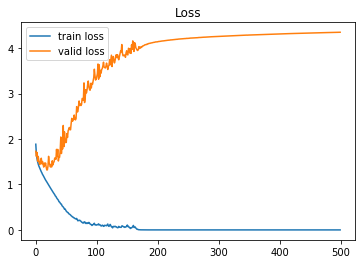

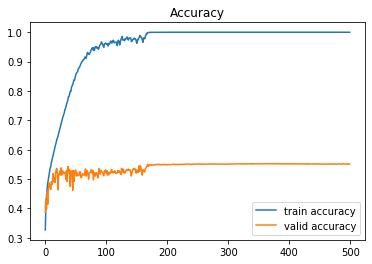

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()